# TinyML - Convolutional Neural Networks (CNN)


#### Federal University of Rio Grande do Norte

#### Name: Thommas Kevin Sales Flores


## 0. Install the libraries listed in the requirements.txt file

In [4]:
#!pip install -r requirements.txt

## 1. Importing libraries

In [1]:
import numpy as np
from sklearn.datasets import load_digits
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import time
import seaborn as sns
import os
from tensorflow.keras.utils import plot_model

In [2]:
!#pip install keras

'#pip' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


In [3]:
'''
with open('requirements.txt', 'w') as f:
    f.write(f"scikit-learn=={sklearn.__version__}\n")
    f.write(f"tensorflow=={tf.__version__}\n")
    f.write(f"numpy=={np.__version__}\n")
    f.write(f"matplotlib=={matplotlib.__version__}\n")
    f.write(f"seaborn=={sns.__version__}\n")
'''

'\nwith open(\'requirements.txt\', \'w\') as f:\n    f.write(f"scikit-learn=={sklearn.__version__}\n")\n    f.write(f"tensorflow=={tf.__version__}\n")\n    f.write(f"numpy=={np.__version__}\n")\n    f.write(f"matplotlib=={matplotlib.__version__}\n")\n    f.write(f"seaborn=={sns.__version__}\n")\n'

## 2. Load Dataset

MNIST, short for Modified National Institute of Standards and Technology database, is a widely used dataset in the field of machine learning and computer vision. It consists of a collection of handwritten digits ranging from 0 to 9, each digit being represented as a grayscale image of size 28x28 pixels. The dataset contains a total of 70,000 images, with 60,000 images used for training and 10,000 images used for testing.

link: https://www.nist.gov/itl/products-and-services/emnist-dataset

In [4]:
def get_data():
    np.random.seed(1337)
    x_values, y_values = load_digits(return_X_y=True)
    x_values /= x_values.max()
    # reshape to (8 x 8 x 1)
    x_values = x_values.reshape((len(x_values), 8, 8, 1))
    # split into train, validation, test
    TRAIN_SPLIT = int(0.6 * len(x_values))
    TEST_SPLIT = int(0.2 * len(x_values) + TRAIN_SPLIT)
    x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
    y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

    return x_train, x_test, x_validate, y_train, y_test, y_validate

## 3. Splitting the data

In [5]:
X_train, X_test, X_validate, y_train, y_test, y_validate = get_data()

In [7]:
y_train.shape

(1078,)

## 4. Exploratory Data Analysis

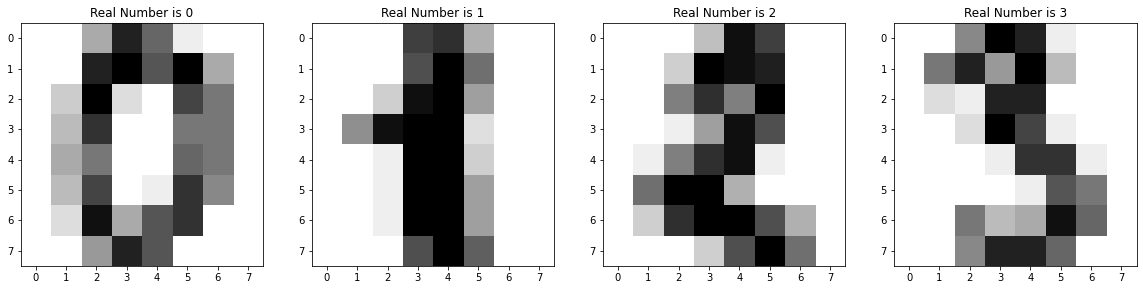

In [8]:
X_train__ = X_train.reshape(X_train.shape[0], 8, 8)

fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train__[i], cmap='binary')
    digit = y_train[i]
    ax.set(title = f"Real Number is {digit}")

## 5. Define the model

In [9]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(8, 8, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(len(np.unique(y_train))))


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 6, 8)           80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 8)           0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 72)                0         
                                                                 
 dense (Dense)               (None, 10)                730       
                                                                 
Total params: 810 (3.16 KB)
Trainable params: 810 (3.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


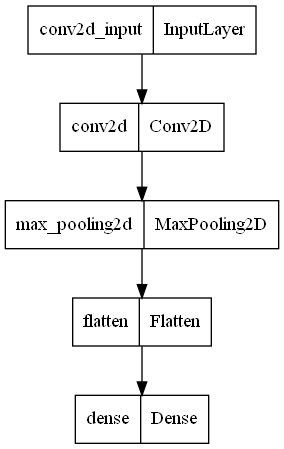

In [11]:
plot_model(model, to_file='./figures/model.png')

## 6. Compile the model

In [12]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

## 7. Training model

In [13]:
history =  model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=16,
                    validation_data=(X_validate, y_validate))

Epoch 1/50


68/68 [==============================] - 1s 8ms/step - loss: 2.3001 - accuracy: 0.1141 - val_loss: 2.2455 - val_accuracy: 0.1583
Epoch 2/50
68/68 [==============================] - 0s 3ms/step - loss: 2.1916 - accuracy: 0.2755 - val_loss: 2.1236 - val_accuracy: 0.4556
Epoch 3/50
68/68 [==============================] - 0s 4ms/step - loss: 2.0010 - accuracy: 0.5983 - val_loss: 1.8933 - val_accuracy: 0.5750
Epoch 4/50
68/68 [==============================] - 0s 3ms/step - loss: 1.6870 - accuracy: 0.7495 - val_loss: 1.5811 - val_accuracy: 0.7444
Epoch 5/50
68/68 [==============================] - 0s 4ms/step - loss: 1.3221 - accuracy: 0.8321 - val_loss: 1.2755 - val_accuracy: 0.7889
Epoch 6/50
68/68 [==============================] - 0s 3ms/step - loss: 0.9938 - accuracy: 0.8831 - val_loss: 1.0332 - val_accuracy: 0.7861
Epoch 7/50
68/68 [==============================] - 0s 3ms/step - loss: 0.7486 - accuracy: 0.9063 - val_loss: 0.8832 - val_accuracy: 0.7889
Epoch 8/50
68/68 [

In [14]:
model.save('.\models\model.keras')

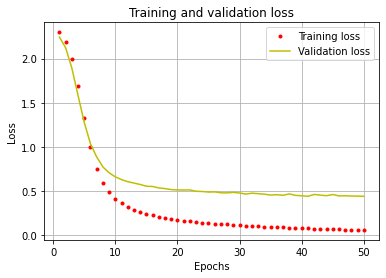

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r.', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.savefig('.\\figures\\history_traing.png', dpi=300, bbox_inches='tight')
plt.show()

## 8. Model Evaluation

### 8.1 Test Data

In [16]:
def test_model(model, x_test, y_test):
    x_test = (x_test / x_test.max()).reshape((len(x_test), 8, 8, 1))
    y_pred = model.predict(x_test).argmax(axis=1)
    print('ACCURACY', ((y_pred == y_test).sum() / len(y_test))*100, "%")

In [17]:
test_model(model, X_test, y_test)

12/12 [==============================] - 0s 1ms/step
ACCURACY 95.82172701949861 %


### 8.2 Confusion matrix

12/12 [==============================] - 0s 2ms/step


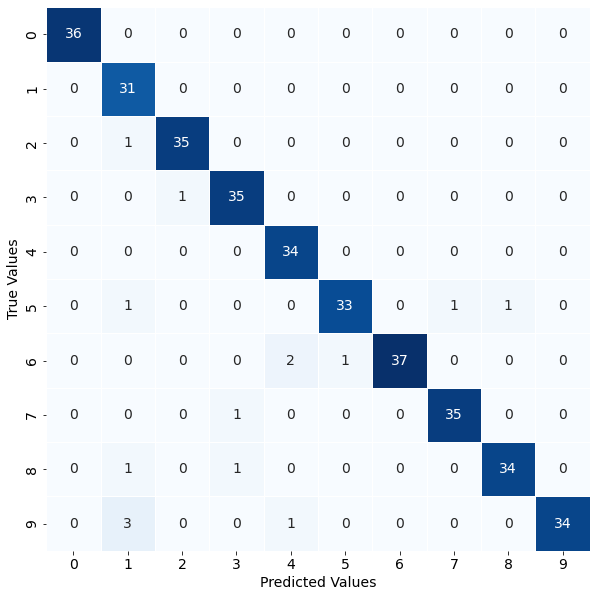

In [18]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(X_test) # Predict class probabilities as 2 => [0.1, 0, 0.9, 0, 0, 0, 0, 0, 0, 0]
Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
mat = confusion_matrix(y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test), 
            annot_kws={"fontsize": 14}, linewidths=1, linecolor='white')

plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('True Values', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('.\\figures\\confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

 ### 8.3 Prediction validation results

12/12 [==============================] - 0s 1ms/step


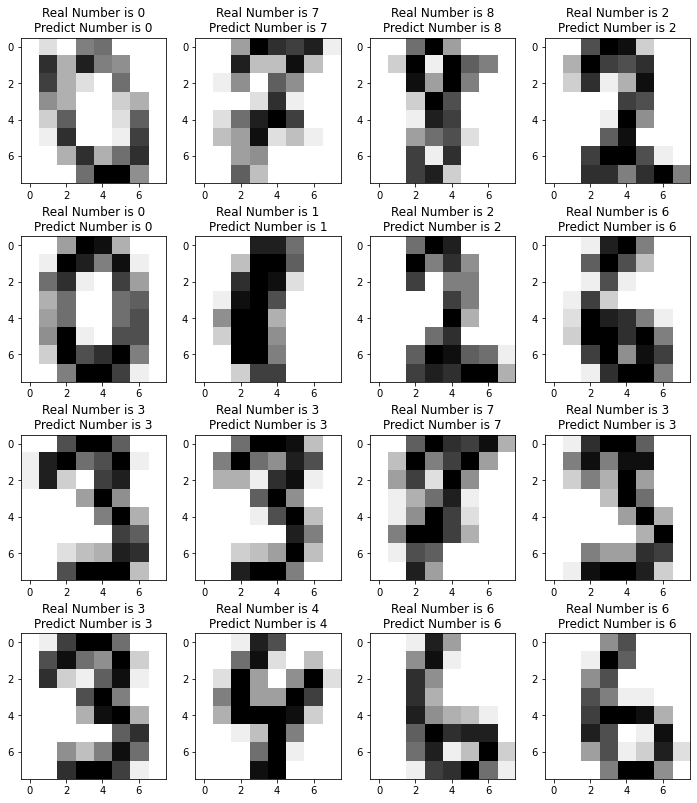

In [19]:
y_pred = model.predict(X_test)
X_test__ = X_test

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i]}\nPredict Number is {y_pred[i].argmax()}")

## 9. Obtaining the model to be implemented in the microcontroller

### 9.1 Convert some hex value into an array for C programming

In [20]:
# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):

  c_str = ''

  # Create header guard
  c_str += '#ifdef __has_attribute\n'
  c_str += '#define HAVE_ATTRIBUTE(x) __has_attribute(x)\n'
  c_str += '#else\n'
  c_str += '#define HAVE_ATTRIBUTE(x) 0\n'
  c_str += '#endif\n'
  c_str += '#if HAVE_ATTRIBUTE(aligned) || (defined(__GNUC__) && !defined(__clang__))\n'
  c_str += '#define DATA_ALIGN_ATTRIBUTE __attribute__((aligned(4)))\n'
  c_str += '#else\n'
  c_str += '#define DATA_ALIGN_ATTRIBUTE\n'
  c_str += '#endif\n\n'

  # Declare C variable
  c_str += 'const unsigned char ' + var_name + '[]  DATA_ALIGN_ATTRIBUTE = {'
  hex_array = []
  for i, val in enumerate(hex_data) :

    # Construct string from hex
    hex_str = format(val, '#04x')

    # Add formatting so each line stays within 80 characters
    if (i + 1) < len(hex_data):
      hex_str += ','
    if (i + 1) % 12 == 0:
      hex_str += '\n '
    hex_array.append(hex_str)

  # Add closing brace
  c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

  # Close out header guard
  c_str += 'const int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  return c_str

### 9.2 Convert o model to Float32 and Int8

In [21]:
def representative_dataset():
    for i in range(len(X_train)):
        input_data = np.array([X_train[i]], dtype=np.float32)
        yield [input_data]



def converter_quantization_model(model, model_name):

    # Convert o model to float32
    converter_float32 = tf.lite.TFLiteConverter.from_keras_model(model)
    converter_float32.optimizations = [tf.lite.Optimize.DEFAULT]
    converter_float32.target_spec.supported_types = [tf.float32]
    converter_float32._experimental_lower_tensor_list_ops = False
    converter_float32.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
    converter_float32.representative_dataset = representative_dataset
    tflite_model_float32 = converter_float32.convert()
    print(tflite_model_float32)
    with open(model_name+'_quant_float32' + '.h', 'w') as file:
        file.write(hex_to_c_array(tflite_model_float32, model_name+'_quant_float32'))
    with open(model_name+'_quant_float32.tflite', 'wb') as f:
        f.write(tflite_model_float32)
    size_model_tflite_float32 = os.path.getsize(model_name+'_quant_float32.tflite')
    print(model_name+f'_quant_float32.tflite: {size_model_tflite_float32} Bytes')


    # Convert o model to Int8
    converter_int8 = tf.lite.TFLiteConverter.from_keras_model(model)
    converter_int8.optimizations = [tf.lite.Optimize.DEFAULT]
    converter_int8.target_spec.supported_types = [tf.int8]
    #converter_int8._experimental_lower_tensor_list_ops = False
    converter_int8.representative_dataset = representative_dataset
    converter_int8.target_spec.supported_ops = [
        tf.lite.OpsSet.TFLITE_BUILTINS_INT8,
        tf.lite.OpsSet.SELECT_TF_OPS,
    ]
    converter_int8.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]
    converter_int8.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
    converter_int8.experimental_new_converter = True
    converter_int8.experimental_new_quantizer = True
    converter_int8.experimental_new_calibrator = True
    tflite_model_int8 = converter_int8.convert()
    with open(model_name+'_quant_int8' + '.h', 'w') as file:
        file.write(hex_to_c_array(tflite_model_int8, model_name+'_quant_int8'))
    with open(model_name+'_quant_int8.tflite', 'wb') as f:
        f.write(tflite_model_int8)
    size_model_tflite_int8 = os.path.getsize(model_name+'_quant_int8.tflite')
    print(model_name+f'_quant_int8.tflite: {size_model_tflite_int8} Bytes')

    return None

In [22]:
model_name='.\models\model'
converter_quantization_model(model, model_name)

INFO:tensorflow:Assets written to: C:\Users\Thommas\AppData\Local\Temp\tmp0vtkbe36\assets


INFO:tensorflow:Assets written to: C:\Users\Thommas\AppData\Local\Temp\tmp0vtkbe36\assets


b'\x1c\x00\x00\x00TFL3\x14\x00 \x00\x1c\x00\x18\x00\x14\x00\x10\x00\x0c\x00\x00\x00\x08\x00\x04\x00\x14\x00\x00\x00\x1c\x00\x00\x00\x88\x00\x00\x00\xe0\x00\x00\x00\x9c\x0e\x00\x00\xac\x0e\x00\x00l\x14\x00\x00\x03\x00\x00\x00\x01\x00\x00\x00\x04\x00\x00\x00\xe2\xf0\xff\xff\x0c\x00\x00\x00\x1c\x00\x00\x008\x00\x00\x00\x0f\x00\x00\x00serving_default\x00\x01\x00\x00\x00\x04\x00\x00\x00\x94\xff\xff\xff\t\x00\x00\x00\x04\x00\x00\x00\x05\x00\x00\x00dense\x00\x00\x00\x01\x00\x00\x00\x04\x00\x00\x00\x02\xf2\xff\xff\x04\x00\x00\x00\x0c\x00\x00\x00conv2d_input\x00\x00\x00\x00\x02\x00\x00\x004\x00\x00\x00\x04\x00\x00\x00\xdc\xff\xff\xff\x0c\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00CONVERSION_METADATA\x00\x08\x00\x0c\x00\x08\x00\x04\x00\x08\x00\x00\x00\x0b\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00min_runtime_version\x00\r\x00\x00\x00\xb8\r\x00\x00\xb0\r\x00\x00\x80\r\x00\x00H\x0c\x00\x00\x10\x0c\x00\x00\xf8\x0b\x00\x00\xa8\x00\x00\x00\xa0\x00\x00\x00\x98\x00\x00\x00\x90\x00\x00\x00\x88\x00\x00\

INFO:tensorflow:Assets written to: C:\Users\Thommas\AppData\Local\Temp\tmp3015q2tr\assets


.\models\model_quant_int8.tflite: 3800 Bytes


c:\Python39\lib\site-packages\tensorflow\lite\python\convert.py:953: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


## 10. Quantized Model Evaluation

In [23]:
def evaluate_quantization(model_path, X_test, y_test, quantization_type):
    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()

    # Avaliar o modelo quantizado
    input_index = interpreter.get_input_details()[0]['index']
    output_index = interpreter.get_output_details()[0]['index']
    predictions = []
    processing_times = []

    X_test = np.array(X_test, dtype=np.float32)
    
    for X in X_test:
        interpreter.set_tensor(input_index, [X])       
        start_time = time.time()
        interpreter.invoke()
        end_time = time.time()
        processing_time = end_time - start_time
        processing_times.append(processing_time)
        output = interpreter.get_tensor(output_index).argmax(axis=1)
        predictions.append(output[0])

    acc = accuracy_score(y_test, predictions)
   
    # Calcular a média e o desvio padrão das diferenças
    result = { "Accuracy (%): ":acc*100,
                "Process time (s): ": np.mean(processing_times)
            }

    return result

In [24]:
model_name = '.\models\model'

In [25]:
eval_quant_float32 = evaluate_quantization(model_name + '_quant_float32.tflite', X_test, y_test, 'float32')
eval_quant_float32


{'Accuracy (%): ': 95.82172701949861,
 'Process time (s): ': 1.4042123778616817e-05}

In [26]:
eval_quant_int8 = evaluate_quantization(model_name + '_quant_int8.tflite', X_test, y_test, 'int8')
eval_quant_int8 

{'Accuracy (%): ': 95.82172701949861, 'Process time (s): ': 0.0}